In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
pd.options.display.float_format = "{:,.2f}".format
%matplotlib inline

In [10]:
data = pd.read_csv('melb_data.csv')
data.drop(['Suburb','Address','SellerG','Date','BuildingArea','YearBuilt'],axis=1,inplace=True)

In [14]:
first_data = data[['Price','Rooms','Bathroom','Bedroom2','Car','Landsize']]

In [17]:
first_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     13580 non-null  float64
 1   Rooms     13580 non-null  int64  
 2   Bathroom  13580 non-null  float64
 3   Bedroom2  13580 non-null  float64
 4   Car       13518 non-null  float64
 5   Landsize  13580 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 636.7 KB


In [18]:
first_data.dropna(axis=0,inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_8832\2159019318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_data.dropna(axis=0,inplace=True)


In [19]:
first_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13518 entries, 0 to 13579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     13518 non-null  float64
 1   Rooms     13518 non-null  int64  
 2   Bathroom  13518 non-null  float64
 3   Bedroom2  13518 non-null  float64
 4   Car       13518 non-null  float64
 5   Landsize  13518 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 739.3 KB


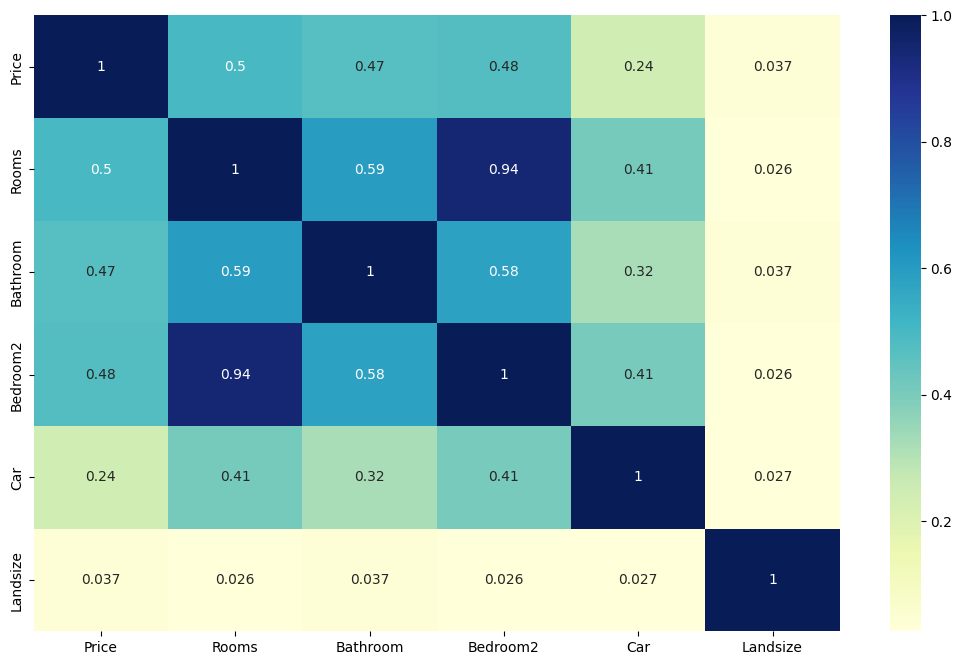

In [20]:
plt.figure(figsize=(13,8))
sns.heatmap(first_data.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [51]:
Y = first_data.Price
X = first_data.drop('Price',axis=1)

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X,Y)

In [34]:
regression_model = LinearRegression()
regression_model.fit(x_train,y_train)
y_regresssion = regression_model.predict(x_test)

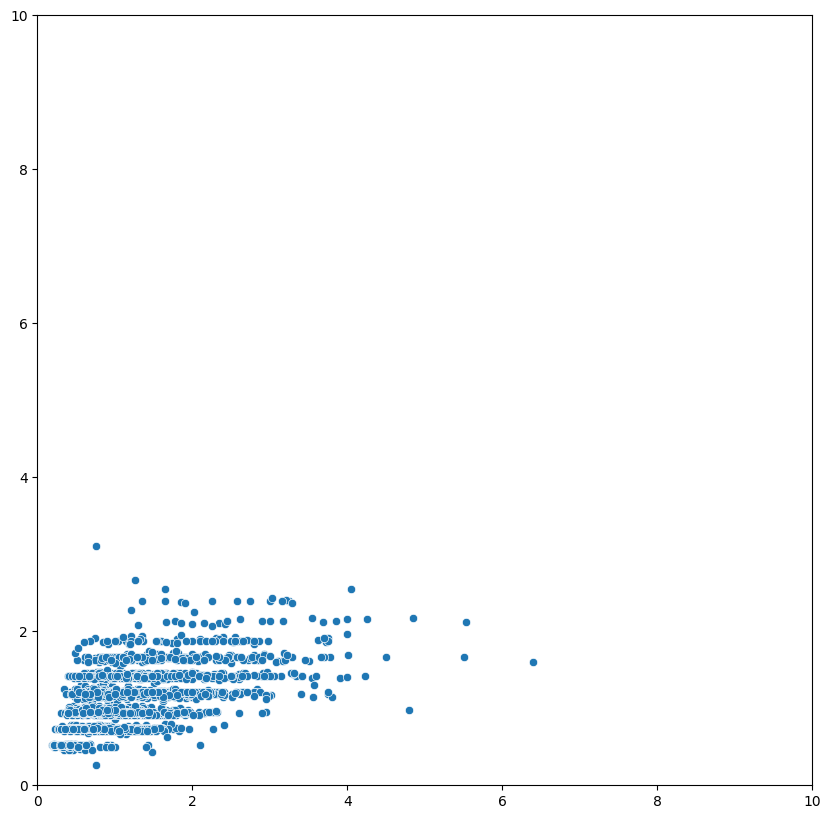

In [35]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test.values/1000000,y=y_regresssion/1000000)
plt.ylim(0,10)
plt.xlim(0,10)
plt.show()

In [37]:
regression_square_error = mean_squared_error(y_test,y_regresssion)
regression_square_error

282050096458.6186

In [39]:
regression_r2_score = r2_score(y_test,y_regresssion)
regression_r2_score

0.30922455801201565

In [56]:
second_data = data[['Price','Rooms','Bathroom','Bedroom2','Car','Longtitude','Lattitude','Distance','Landsize','Postcode','Propertycount']]

In [41]:
second_data.dropna(axis=0,inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_8832\1892593024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_data.dropna(axis=0,inplace=True)


In [57]:
Y = second_data.Price
X = second_data.drop('Price',axis=1)

In [43]:
x_train,x_test,y_train,y_test = train_test_split(X,Y)
second_regression_model = LinearRegression()
second_regression_model.fit(x_train,y_train)
second_y_regression = second_regression_model.predict(x_test)
second_regression_square_error = mean_squared_error(y_test,second_y_regression)
print(second_regression_square_error)
second_r2_score_regression = r2_score(y_test,second_y_regression)
print(second_r2_score_regression)

206146390980.224
0.46463008778818493


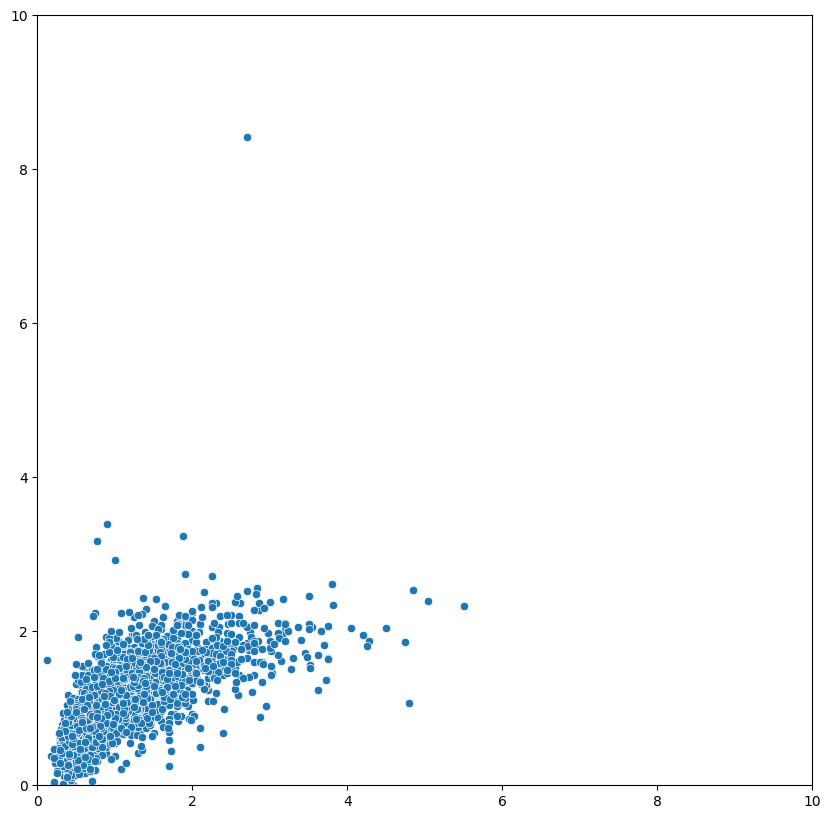

In [44]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test.values/1000000,y=second_y_regression/1000000)
plt.ylim(0,10)
plt.xlim(0,10)
plt.show()

In [59]:
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train,y_train)
y_tree = tree_model.predict(x_test)

In [60]:
tree_square_error = mean_squared_error(y_test,y_tree)
print(tree_square_error)
tree_r2_score = r2_score(y_test,y_tree)
print(tree_r2_score)

160494069521.9952
0.5817498723170249


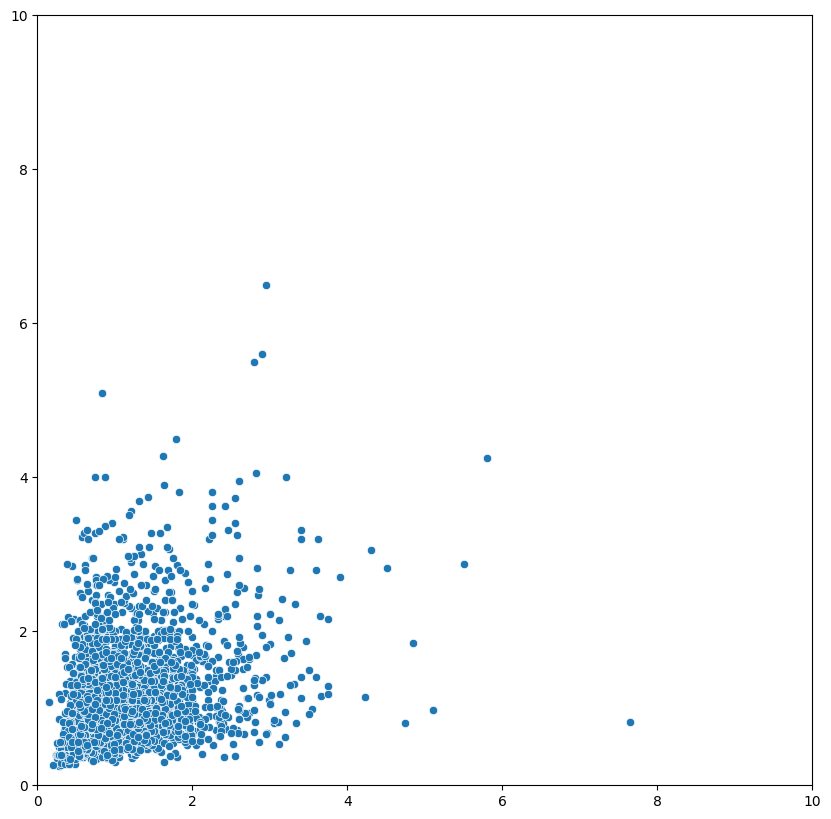

In [55]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test.values/1000000,y=y_tree/1000000)
plt.ylim(0,10)
plt.xlim(0,10)
plt.show()